## STEP-1: LOAD THE DATA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the data
df = pd.read_csv("churn_dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
# Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# TO CHECK MISSING VALUES IN THE DATASET:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['TotalCharges']=df['TotalCharges'].replace(' ', np.nan)

In [8]:
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [9]:
df.isnull().sum()df['TotalCharges']=df['TotalCharges'].replace(' ', np.nan)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# Convert 'TotalCharges' to Numeric:
df['TotalCharges']=df['TotalCharges'].astype('float64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df['TotalCharges'].median()

1397.475

In [13]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

### NOTE:  We encountered 11 null values in the Total Charges column, which were replaced with the median value of 1397.475."

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Exploratory Data Analysis:

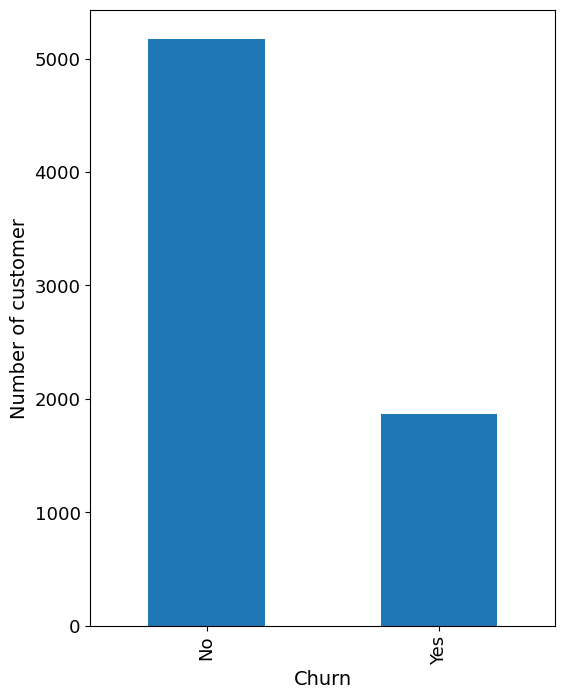

In [16]:
# Analysing churn column with BAR PLOT:
ax = df['Churn'].value_counts().plot(kind = 'bar',figsize=(6,8),fontsize = 13)
ax.set_ylabel("Number of customer",fontsize = 14);
ax.set_xlabel("Churn",fontsize = 14);

### NOTE:The users from the data are likely to be continuing their subscription plan (>70%).

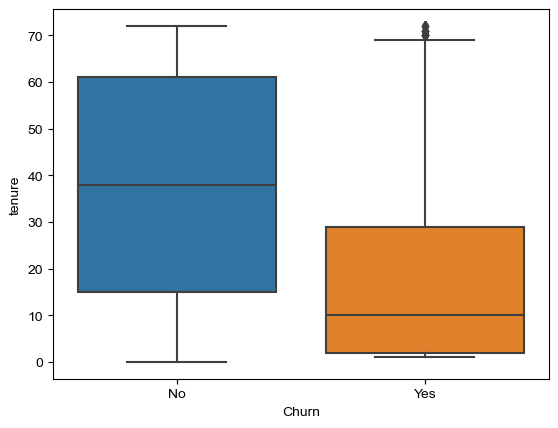

In [17]:
# Analysing churn & tenure column with BOX PLOT:
sns.boxplot(x = 'Churn',y = 'tenure',data = df)
sns.set(rc = {'figure.figsize':(10,8)})

### NOTE:
### 1.There are some outliers in existing customers.
### 2.Customers who disconnecting their subscription plans are selecting short tenure .So, company need to offer better plans to those customers who choose short tenures.

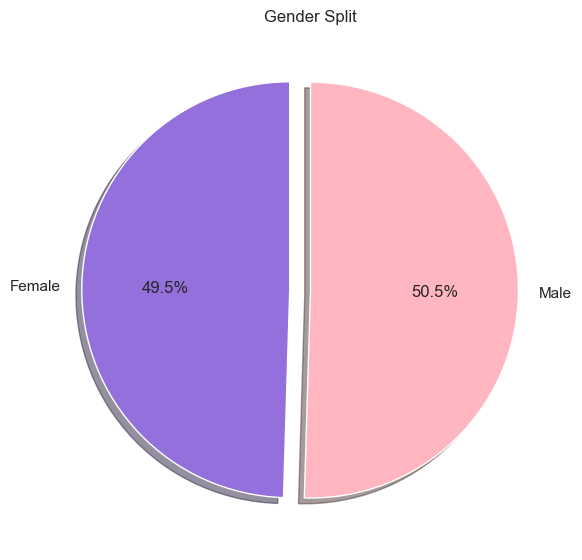

In [18]:
# Analysing gender column with PIE PLOT:
from collections import Counter
labels,values = zip(*Counter(df["gender"]).items())
colors = ['mediumpurple','lightpink']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()
piechart_df
fig = plt.figure(figsize=[6,6])

plt.pie(piechart_df[0],labels = piechart_df["index"],startangle = 90,explode = (0.1,0),autopct = "%1.1f%%",shadow = True,colors = colors)
plt.tight_layout()
plt.title("Gender Split")
plt.show()

### NOTE: 
### 1.Female subscribers are 49.5% of the total.
### 2.Male subscribers are 50.5% of the total.

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

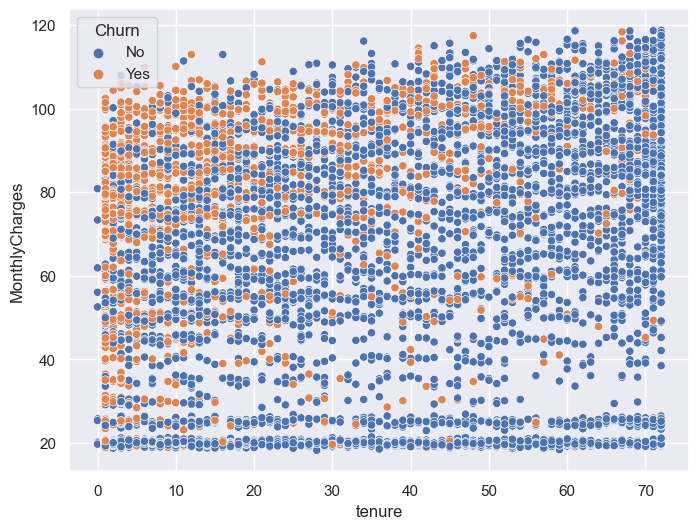

In [19]:
# Analysing tenure & Monthlycharges column with SCATTER PLOT:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'tenure',y = 'MonthlyCharges',hue = "Churn",data = df)

## NOTE:
### 1.Customers paying high monthly charges for short tenures are disconnecting.
### 2.Customers paying high monthly charges for long tenures are continuing with their subscription plans as it is reasonable cost.

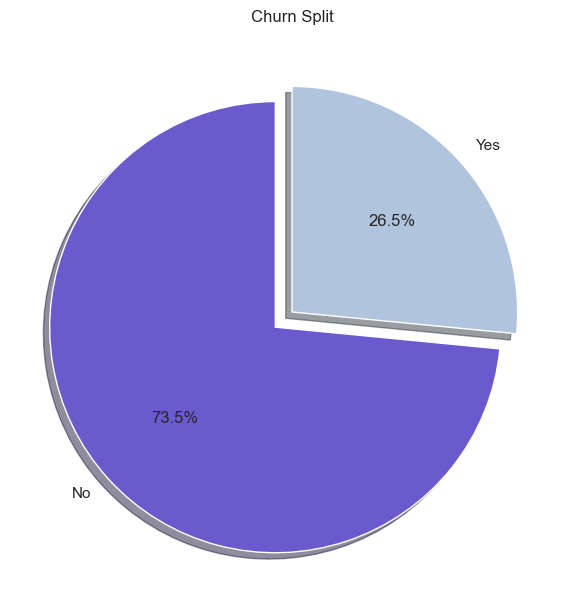

In [20]:
## Analysing tenure & Monthlycharges column with SCATTER PLOT:
from collections import Counter
labels,values = zip(*Counter(df["Churn"]).items())
colors = ['slateblue','lightsteelblue']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()
piechart_df
fig = plt.figure(figsize=[6,6])

plt.pie(piechart_df[0],labels = piechart_df["index"],startangle = 90,explode = (0.1,0),autopct = "%1.1f%%",shadow = True,colors = colors)
plt.tight_layout()
plt.title("Churn Split")
plt.show()

## NOTE:73.5% customers are continuing their subscription and 26.5% customers are disconnected.

## STEP-2: Document the below mentioned points properly: - Identify the input and output/target variables. - Identify the type of ML Task. - Identify the Evaluation Metric. - For regression task - Mean Absolute Error - For classification task - Accuracy.
- Target variable : Churn
- Target variable present in historical data : Supervised M.L
- Target variable is Continuous : Classification
- For Classification task : Accuracy

## Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).

In [21]:
from sklearn.model_selection import train_test_split

y =df['Churn'] # output
X =df.iloc[:,1:20] #input

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 75:25 split

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (5282, 19) (5282,)
Testing set shape: (1761, 19) (1761,)


## Step-4: Data preparation on train data:
- For Numerical Variables 
- Standardization or Normalization (Fit and Transform)


In [22]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

## RESCALING NUM COLUMNS IN TRAIN DATA

In [23]:
# Rescaling numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6607,-0.436091,-1.282882,-1.310046,-0.998652
2598,-0.436091,-1.037857,0.344832,-0.778236
2345,-0.436091,-1.160369,-1.484331,-0.972098
4093,-0.436091,-0.139429,0.373049,-0.032675
693,-0.436091,-1.201207,0.343172,-0.890407


In [24]:
X_train_num.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,0.159788,32.414237,64.762609,2289.327367
std,0.366444,24.489554,30.125932,2267.298905
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.450000,403.562500
50%,0.000000,29.000000,70.400000,1397.562500
75%,0.000000,55.000000,89.850000,3814.250000
max,1.000000,72.000000,118.600000,8684.800000


In [25]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 4
Mean of each column: [1.59787959e-01 3.24142370e+01 6.47626089e+01 2.28932737e+03]
std of each column: [3.66409289e-01 2.44872354e+01 3.01230801e+01 2.26708427e+03]


## RESCALING CAT COLUMNS IN TRAIN DATA

In [26]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)
X_train_cat_tansformed.head()


,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6607,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2598,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2345,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4093,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
693,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [27]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_tansformed], axis=1)

X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6607,-0.436091,-1.282882,-1.310046,-0.998652,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2598,-0.436091,-1.037857,0.344832,-0.778236,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2345,-0.436091,-1.160369,-1.484331,-0.972098,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4093,-0.436091,-0.139429,0.373049,-0.032675,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
693,-0.436091,-1.201207,0.343172,-0.890407,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## STEP-5: Data preparation on test data:
- For Numerical Variables - Standardization (Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)

In [28]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

## RESCALING NUM COLUMNS IN TEST DATA

In [29]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
185,-0.436091,-1.282882,-1.326644,-0.998872
2715,-0.436091,0.350622,-1.311705,-0.570282
3825,-0.436091,0.799836,-1.507569,-0.554733
1807,-0.436091,-1.282882,0.384668,-0.976134
132,-0.436091,1.412400,-0.471818,0.428203


## RESCALING  CAT COLUMNS IN TEST DATA

In [30]:
X_test_cat_transformed = pd.DataFrame(encoder_.transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_test_cat.index)
X_test_cat_transformed.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
185,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2715,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3825,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1807,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
132,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [31]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
185,-0.436091,-1.282882,-1.326644,-0.998872,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2715,-0.436091,0.350622,-1.311705,-0.570282,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3825,-0.436091,0.799836,-1.507569,-0.554733,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1807,-0.436091,-1.282882,0.384668,-0.976134,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
132,-0.436091,1.412400,-0.471818,0.428203,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Step - 6: Model Training Phase 
- Use all the algorithms mentioned below to train separate models:
- KNN
- Logistic Regression
- Support Vector Machines
- Decision Trees
- Random Forest


## LOGISTIC REGRESSION

In [32]:
from sklearn.linear_model import LogisticRegression

LR_classifier = LogisticRegression()

LR_classifier.fit(X_train_transformed,y_train)

LogisticRegression()

## KNN CLASSIFIER

In [33]:
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier()

KNN_classifier.fit(X_train_transformed,y_train)

KNeighborsClassifier()

## SVM

In [34]:
from sklearn.svm import SVC

SV_classifier = SVC()

SV_classifier.fit(X_train_transformed,y_train)

SVC()

## DECISION TREE

In [35]:
from sklearn.tree import DecisionTreeClassifier

DT_classifier = DecisionTreeClassifier()

DT_classifier.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

## RANDOM FOREST

In [36]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier()

RF_classifier.fit(X_train_transformed,y_train)

RandomForestClassifier()

## Step - 7: Predict and evaluate each model separately using the correct evaluation metric. Use metrics.accuracy_score(actual, predict).


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

## LOGISTIC REGRESSION

In [38]:
#Predict using Logistic Regression (LR)
y_test_predicted = LR_classifier.predict(X_test_transformed)
a1= metrics.accuracy_score(y_test,y_test_predicted)
print("LR Accuracy:",a1)

LR Accuracy: 0.8126064735945485


## KNN CLASSIFIER

In [39]:
#Predict using KNN Classifier(KNN)
X_test_np = np.array(X_test_transformed)

y_test_predicted = KNN_classifier.predict(X_test_np)
a2 = accuracy_score(y_test, y_test_predicted)
print("KNN Accuracy:",a2)

KNN Accuracy: 0.768313458262351


## SVM

In [40]:
#Predict using Support Vector Machines (SVM)
y_test_predicted_svm = SV_classifier.predict(X_test_transformed)
a3 = accuracy_score(y_test, y_test_predicted_svm)
print("SVM Accuracy:",a3)

SVM Accuracy: 0.80465644520159


## DECISION TREE

In [41]:
# Predict using Decision Trees
y_test_predicted_dt = DT_classifier.predict(X_test_transformed)
a4 = accuracy_score(y_test, y_test_predicted_dt)
print("Decision Tree Accuracy:",a4)

Decision Tree Accuracy: 0.7177739920499716


## RANDOM FOREST

In [42]:
# Predict using Random Forest
y_test_predicted_rf = RF_classifier.predict(X_test_transformed)
a5 = accuracy_score(y_test, y_test_predicted_rf)
print("Random Forest Accuracy:",a5)

Random Forest Accuracy: 0.7881885292447472


## Step-9: Display a plot which shows all the algorithms applied along with the accuracies achieved.

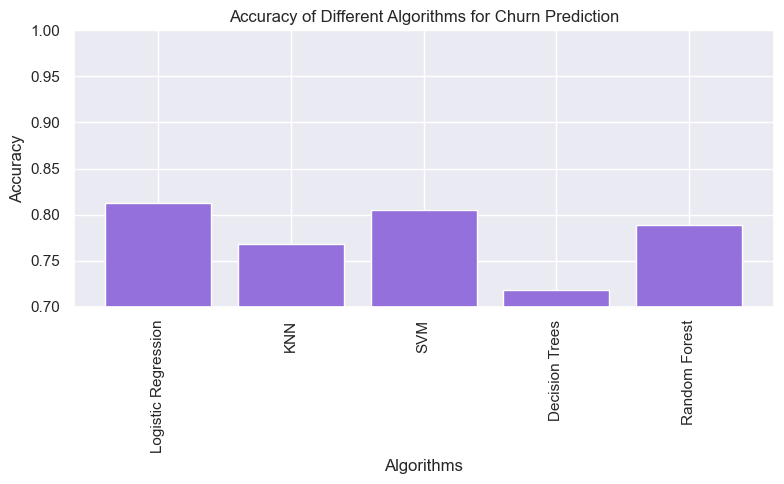

In [44]:
classifiers = ['Logistic Regression', 'KNN', 'SVM', 'Decision Trees', 'Random Forest']
accuracies = [a1 , a2, a3, a4, a5]


plt.figure(figsize=(8, 5))
plt.bar(classifiers, accuracies, color='mediumpurple')
plt.title('Accuracy of Different Algorithms for Churn Prediction')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1) 
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## CONCLUSION:

## "Logistic Regression stands out as the top algorithm, boasting the highest accuracy among all models tested."